# C3 Simulator as a backend for Qiskit Experiments

This notebook demonstrates the use of the C3 Simulator with a high-level quantum programming framework [Qiskit](https://www.qiskit.org). You must additionally install qiskit and matplotlib to run this example.

In [1]:
import sys
sys.path.append('/home/llguo/PycharmProjects/c3/')

In [2]:
# !pip install -q qiskit matplotlib

In [3]:
from pprint import pprint
import numpy as np
from c3.qiskit import C3Provider
from c3.qiskit.c3_gates import RX90pGate
from qiskit import transpile, execute, QuantumCircuit, Aer
from qiskit.tools.visualization import plot_histogram

2022-06-10 16:33:40.483614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 16:33:40.483646: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Define a basic Quantum circuit

In [4]:
qc = QuantumCircuit(3)
qc.append(RX90pGate(), [0])
qc.append(RX90pGate(), [1])

In [5]:
qc.draw()

┌────────────┐
q_0: ┤ Rx90p(π/2) ├
     ├────────────┤
q_1: ┤ Rx90p(π/2) ├
     └────────────┘
q_2: ──────────────

## Get the C3 Provider and Backend

In [6]:
c3_provider = C3Provider()
c3_backend = c3_provider.get_backend("c3_qasm_physics_simulator")

In [7]:
config = c3_backend.configuration()

print("Name: {0}".format(config.backend_name))
print("Version: {0}".format(config.backend_version))
print("Max Qubits: {0}".format(config.n_qubits))
print("OpenPulse Support: {0}".format(config.open_pulse))
print("Basis Gates: {0}".format(config.basis_gates))

Name: c3_qasm_physics_simulator
Version: 0.1
Max Qubits: 10
OpenPulse Support: False
Basis Gates: ['cx', 'rx']


## Run a physical device simulation using C3

In [8]:
c3_backend.set_device_config("qiskit.cfg")
c3_job = c3_backend.run(qc)
result = c3_job.result()

2022-06-10 16:33:57.923810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 16:33:57.924520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 16:33:57.924589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-10 16:33:57.924652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-10 16:33:57.924713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [9]:
res_counts = result.get_counts()
pprint(res_counts)

{'0': 0.2501927838202701,
 '1': 1.3433543485601177e-47,
 '10': 0.27496041223247036,
 '100': 0.2511657399083323,
 '101': 3.2855674728147143e-34,
 '11': 8.487892395670028e-33,
 '110': 0.22368106403890228,
 '111': 4.031593860679962e-51}


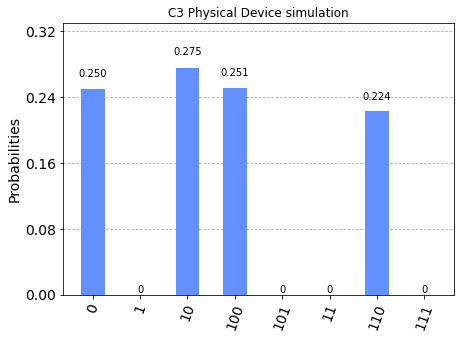

In [10]:
plot_histogram(res_counts, title='C3 Physical Device simulation')

As we can see above, the c3 simulator correctly calculates the populations while accounting for non-optimal pulses and device limitations.

## Run Simulation and verify results on Qiskit simulator

Qiskit uses little-endian bit ordering while most Quantum Computing literature uses big-endian. This is reflected in the reversed ordering of qubit labels here.

Ref: [Basis Vector Ordering in Qiskit](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Basis-vector-ordering-in-Qiskit)

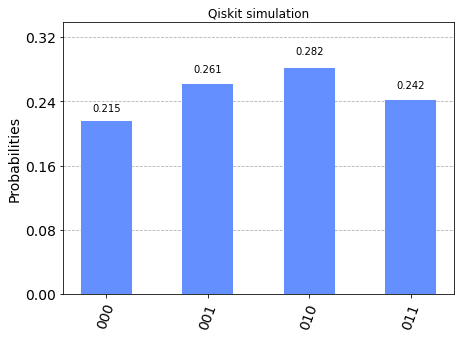

In [11]:
qiskit_simulator = Aer.get_backend('qasm_simulator')
qc.measure_all()
qiskit_result = execute(qc, qiskit_simulator, shots=1000).result()
counts = qiskit_result.get_counts(qc)
plot_histogram(counts, title='Qiskit simulation')